In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [0]:
import io
train = pd.read_csv(io.StringIO(uploaded['titanic_train.csv'].decode('utf-8')))

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


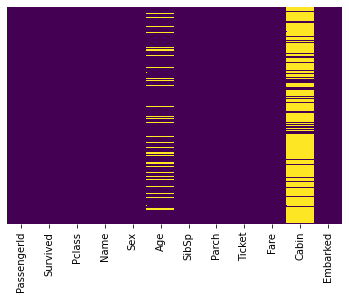

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [0]:
sns.set_style('whitegrid')

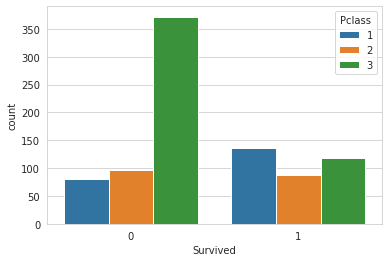

In [26]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

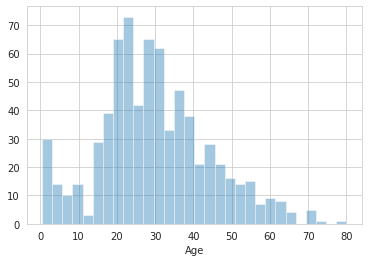

In [28]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


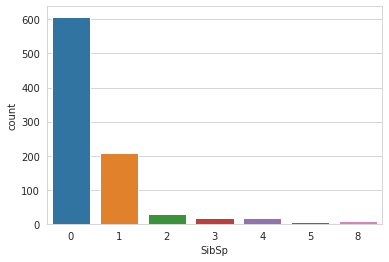

In [31]:
sns.countplot(x = 'SibSp', data = train)

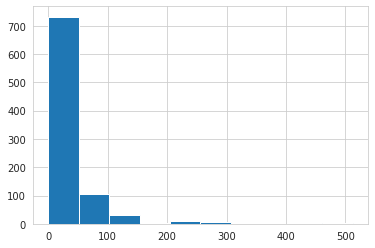

In [33]:
train['Fare'].hist()

In [0]:
import cufflinks as cf

In [35]:
cf.go_offline

<function cufflinks.offline.go_offline>

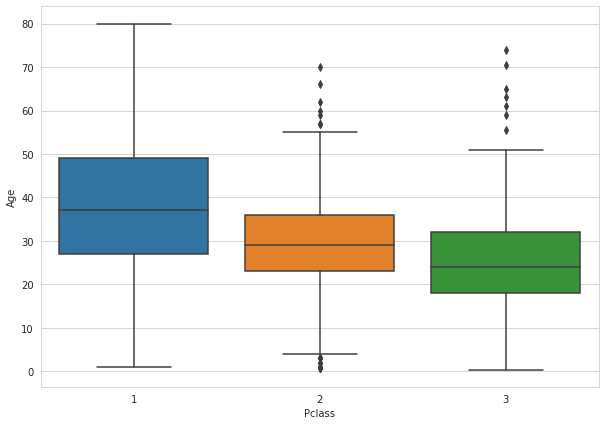

In [39]:
#find the age depending on the class
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [0]:
#creating a function to put avg date depending on the class for null variable in age
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else: 
      return 24
  else:
    return Age

In [0]:
train['Age'] = train [['Age', 'Pclass']].apply(impute_age, axis =1 ) # axis = 1 so it applys to the column

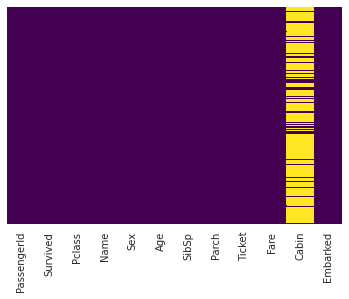

In [43]:
sns.heatmap(train.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

In [48]:
#train.drop('Cabin', axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [0]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)
train = pd.concat([train,sex,embark], axis = 1)

In [15]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0


In [0]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1,1,0,1


In [0]:
#------------------------------------------------------------------------------------------------------
#traininig the model -> setting it up

In [0]:
X = train.drop('Survived', axis = 1)
y = train ['Survived']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()

In [0]:
#training the model
#logmodel.fit(X_train, y_train)

In [0]:
from sklearn.metrics import confusion_matrix